In [1]:
"""
Michael Murray 1/14/2020
ArchBot Tree data

https://python-graph-gallery.com/85-density-plot-with-matplotlib/ [source]
https://kdepy.readthedocs.io/en/latest/introduction.html
"""

'\nMichael Murray 1/14/2020\nArchBot Tree data\n\nhttps://python-graph-gallery.com/85-density-plot-with-matplotlib/ [source]\nhttps://kdepy.readthedocs.io/en/latest/introduction.html\n'

In [2]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy import stats
from KDEpy import FFTKDE

In [3]:
npOne = np.genfromtxt('Treeone.csv',delimiter='/n')
npThree = np.genfromtxt('TreeThree.csv',delimiter='/n')
npSeven = np.genfromtxt('TreeSeven.csv',delimiter='/n')
file = 'AllBranches.csv'
df = pd.read_csv(file)
PBsOfCutTree = df.Diameter.values[:43]
AllOfCutTree = df.Diameter.values

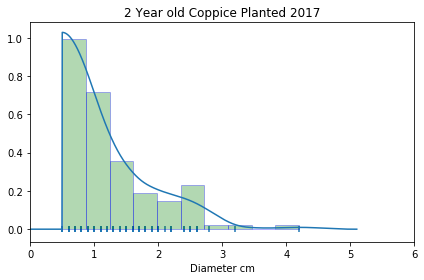

In [4]:

#https://kdepy.readthedocs.io/en/latest/examples.html
# Beta distribution, where x=1 is a hard lower limit

plt.scatter(npOne, np.zeros_like(npOne), marker='|')
plt.hist(npOne, density=True, edgecolor='b', color='g', alpha=0.3)

# Mirror the data about the domain boundary
low_bound = .5
dataOne = np.concatenate((npOne, 2 * low_bound - npOne))

# Compute KDE using the bandwidth found, and twice as many grid points
xOne, yOne = FFTKDE(bw=0.3, kernel='triweight').fit(dataOne)(2**11)
yOne[xOne<=low_bound] = 0  # Set the KDE to zero outside of the domain
yOne = yOne * 2  # Double the y-values to get integral of ~1

plt.xlabel('Diameter cm')
plt.xlim(0, 6)
plt.plot(xOne, yOne, label='Tree One')
plt.title('2 Year old Coppice Planted 2017')
plt.tight_layout()
plt.savefig("OnTwoYearKDE", dpi=300)

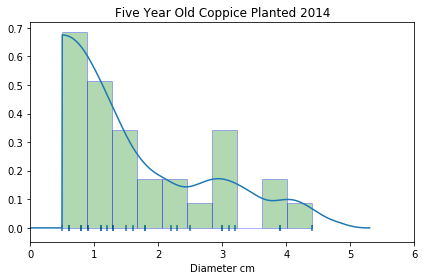

In [5]:
plt.scatter(npSeven, np.zeros_like(npSeven), marker='|')
plt.hist(npSeven, density=True, edgecolor='b', color='g', alpha=0.3)

low_bound = .5
dataSeven = np.concatenate((npSeven, 2 * low_bound - npSeven))

xSeven, ySeven = FFTKDE(bw=0.3, kernel='triweight').fit(dataSeven)(2**11)
ySeven[xSeven<=low_bound] = 0
ySeven = ySeven * 2

plt.xlabel('Diameter cm')
plt.xlim(0, 6)
plt.plot(xSeven, ySeven, label='Tree Seven')
plt.title('Five Year Old Coppice Planted 2014')
plt.tight_layout()
plt.savefig("FiveYearKDE", dpi=300)

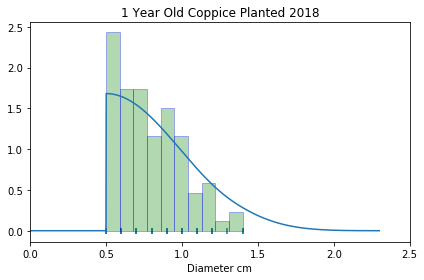

In [6]:
plt.scatter(npThree, np.zeros_like(npThree), marker='|')
plt.hist(npThree, density=True, edgecolor='b', color='g', alpha=0.3)

low_bound = .5
dataThree = np.concatenate((npThree, 2 * low_bound - npThree))

xThree, yThree = FFTKDE(bw=0.3, kernel='triweight').fit(dataThree)(2**11)
yThree[xThree<=low_bound] = 0
yThree = yThree * 2

plt.xlabel('Diameter cm')
plt.xlim(0, 2.5)
plt.plot(xThree, yThree, label='Tree Three')
plt.title('1 Year Old Coppice Planted 2018')
plt.tight_layout()
plt.savefig("OneYearKDE", dpi=300)

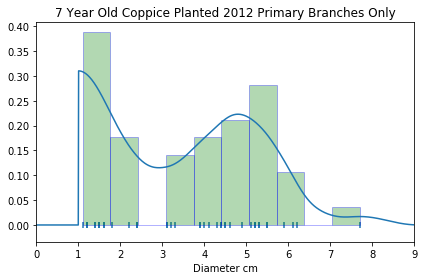

In [23]:
plt.scatter(PBsOfCutTree, np.zeros_like(PBsOfCutTree), marker='|')
plt.hist(PBsOfCutTree, density=True, edgecolor='b', color='g', alpha=0.3)

low_bound =1
dataFour = np.concatenate((PBsOfCutTree, 2 * low_bound - PBsOfCutTree))

xFour, yFour = FFTKDE(bw=0.5, kernel='triweight').fit(dataFour)(2**11)
yFour[xFour<=low_bound] = 0
yFour = yFour * 2

plt.xlabel('Diameter cm')
plt.xlim(0, 9)
plt.plot(xFour, yFour, label='Tree we cut')
plt.title('7 Year Old Coppice Planted 2012 Primary Branches Only')
plt.tight_layout()
plt.savefig("PBYearKDE", dpi=300)

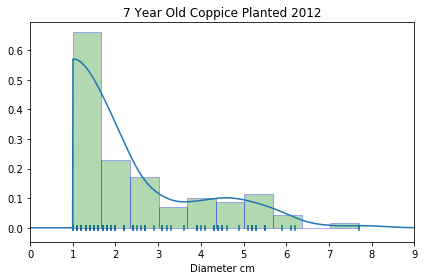

In [8]:
plt.scatter(AllOfCutTree, np.zeros_like(AllOfCutTree), marker='|')
plt.hist(AllOfCutTree, density=True, edgecolor='b', color='g', alpha=0.3)

low_bound =1
dataAll = np.concatenate((AllOfCutTree, 2 * low_bound - AllOfCutTree))

xAll, yAll = FFTKDE(bw=0.5, kernel='triweight').fit(dataAll)(2**11)
yAll[xAll<=low_bound] = 0
yAll = yAll * 2

plt.xlabel('Diameter cm')
plt.xlim(0, 9)
plt.plot(xAll, yAll, label='Tree we cut')
plt.title('7 Year Old Coppice Planted 2012')
plt.tight_layout()
plt.savefig("AllYearKDE", dpi=300)

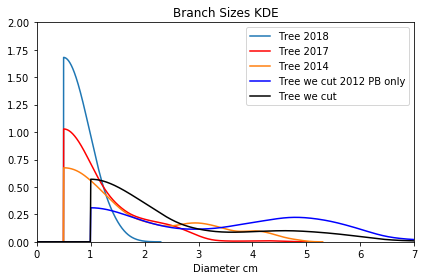

In [9]:
#all in one

plt.plot(xThree, yThree, label='Tree 2018')
plt.plot(xOne, yOne, label='Tree 2017', color = 'r')
plt.plot(xSeven, ySeven, label='Tree 2014')
plt.plot(xFour, yFour, label='Tree we cut 2012 PB only', color = 'b')
plt.plot(xAll, yAll, label='Tree we cut', color = 'k')


plt.xlabel('Diameter cm')
plt.xlim(0, 7)
plt.ylim(0, 2)
plt.title('Branch Sizes KDE')
plt.tight_layout(); plt.legend();

plt.savefig("AllThreeLog", dpi=300)

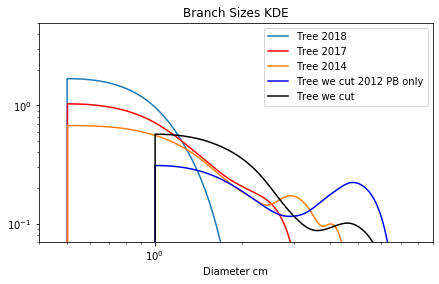

In [10]:
#all in one

plt.plot(xThree, yThree, label='Tree 2018')
plt.plot(xOne, yOne, label='Tree 2017', color = 'r')
plt.plot(xSeven, ySeven, label='Tree 2014')
plt.plot(xFour, yFour, label='Tree we cut 2012 PB only', color = 'b')
plt.plot(xAll, yAll, label='Tree we cut', color = 'k')


plt.xlabel('Diameter cm')
plt.xlim(0.4, 9)
plt.ylim(0.07, 5)
plt.title('Branch Sizes KDE')
plt.tight_layout(); plt.legend();
plt.yscale("log")
plt.xscale("log")
plt.savefig("AllThreeLog", dpi=300)

In [11]:
#log of Scatter



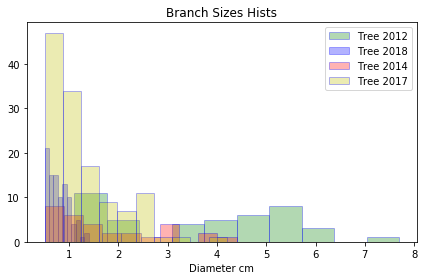

In [12]:
plt.hist(PBsOfCutTree,edgecolor='b', color='g', alpha=0.3,label='Tree 2012')
plt.hist(npThree, edgecolor='b', color='b', alpha=0.3,label='Tree 2018')
plt.hist(npSeven, edgecolor='b', color='r', alpha=0.3,label='Tree 2014')
plt.hist(npOne,  edgecolor='b', color='y', alpha=0.3,label='Tree 2017')

plt.xlabel('Diameter cm')
plt.title('Branch Sizes Hists')
plt.tight_layout(); plt.legend();

plt.savefig("AllThree", dpi=300)

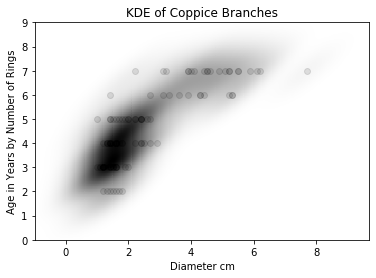

In [28]:
x = df.Diameter.values
y = df.RingAge.values

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = stats.kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min()-2:y.max()+2:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap=plt.cm.binary)
plt.scatter(x,y, color='k', edgecolor='k',alpha=0.1)
plt.xlabel('Diameter cm')
plt.ylabel('Age in Years by Number of Rings')
plt.title('KDE of Coppice Branches')
plt.savefig("TwoD_KDE", dpi=300)
plt.show()

In [14]:
DkunMan = 'unManDk.csv'
dfDkunMn = pd.read_csv(DkunMan)

NlunMan = 'unManNl.csv'
dfNlunMn = pd.read_csv(NlunMan)

NlMan = 'ManNl.csv'
dfNlMn = pd.read_csv(NlMan)

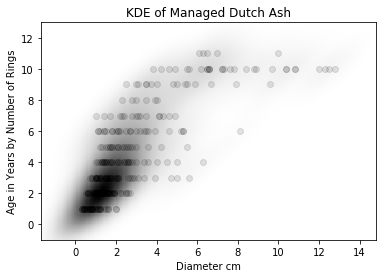

In [38]:
x = dfNlMn.Diameter.values
y = dfNlMn.Age.values

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = stats.kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min()-2:y.max()+2:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap=plt.cm.binary)
plt.scatter(x,y, color='k', edgecolor='k',alpha=0.1)
plt.xlabel('Diameter cm')
plt.ylabel('Age in Years by Number of Rings')
plt.title('KDE of Managed Dutch Ash')
plt.savefig("KDE of Managed Dutch Ash", dpi=300)
plt.show()

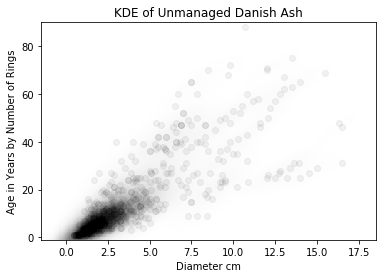

In [39]:
x = dfDkunMn.Diameter.values
y = dfDkunMn.Age.values

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = stats.kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min()-2:y.max()+2:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap=plt.cm.binary)
plt.scatter(x,y, color='k', edgecolor='k',alpha=0.05)
plt.xlabel('Diameter cm')
plt.ylabel('Age in Years by Number of Rings')
plt.title('KDE of Unmanaged Danish Ash')
plt.savefig("KDE of Unmanaged Danish Ash", dpi=300)
plt.show()

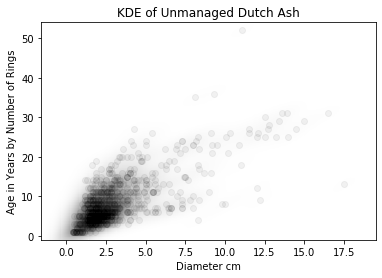

In [40]:
x = dfNlunMn.Diameter.values
y = dfNlunMn.Age.values

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = stats.kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min()-2:x.max()+2:nbins*1j, y.min()-2:y.max()+2:nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap=plt.cm.binary)
plt.scatter(x,y, color='k', edgecolor='k',alpha=0.05)
plt.xlabel('Diameter cm')
plt.ylabel('Age in Years by Number of Rings')
plt.title('KDE of Unmanaged Dutch Ash')
plt.savefig("KDE of Unmanaged Dutch Ash", dpi=300)
plt.show()

In [18]:
DkunManFive = 'unManDkFive.csv'
dfDkunMnFive = pd.read_csv(DkunManFive)

NlunManFive = 'unManNlFive.csv'
dfNlunMnFive = pd.read_csv(NlunManFive)

NlManFive = 'ManNlFive.csv'
dfNlMnFive = pd.read_csv(NlManFive)

(0, 36.2)

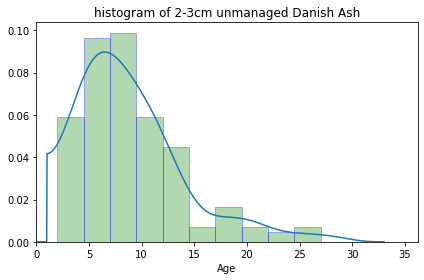

In [33]:
a = dfDkunMnFive.Age.values
plt.hist(a, density=True, edgecolor='b', color='g', alpha=0.3)

low_bound =1
dataq = np.concatenate((a, 2 * low_bound - a))

xq, yq = FFTKDE(bw=2, kernel='triweight').fit(dataq)(2**11)
yq[xq<=low_bound] = 0
yq = yq * 2

plt.xlabel('Age')
plt.plot(xq, yq, label='unmanaged Danish Ash')
plt.title('histogram of 2-3cm unmanaged Danish Ash')
plt.tight_layout()
plt.xlim(0,)

(0, 24.65)

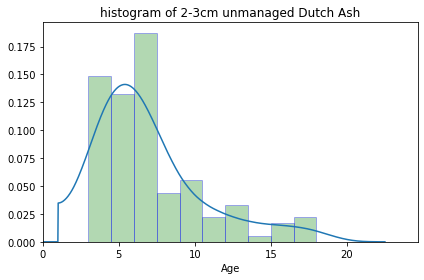

In [34]:
b = dfNlunMnFive.Age.values
plt.hist(b, density=True, edgecolor='b', color='g', alpha=0.3)

low_bound =1
dataw = np.concatenate((b, 2 * low_bound - b))

xw, yw = FFTKDE(bw=1.5, kernel='triweight').fit(dataw)(2**11)
yw[xw<=low_bound] = 0
yw = yw * 2

plt.xlabel('Age')
plt.plot(xw, yw, label='unmanaged Dutch Ash')
plt.title('histogram of 2-3cm unmanaged Dutch Ash')
plt.tight_layout()
plt.xlim(0,)

(0, 13.1)

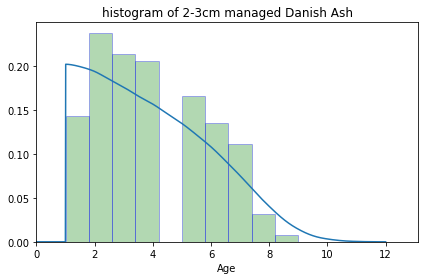

In [35]:
c = dfNlMnFive.Age.values
plt.hist(c, density=True, edgecolor='b', color='g', alpha=0.3)

low_bound =1
datae = np.concatenate((c, 2 * low_bound - c))

xe, ye = FFTKDE(bw=1, kernel='triweight').fit(datae)(2**11)
ye[xe<=low_bound] = 0
ye = ye * 2

plt.xlabel('Age')
plt.plot(xe, ye, label='managed Danish Ash')
plt.title('histogram of 2-3cm managed Danish Ash')
plt.tight_layout()
plt.xlim(0,)

In [25]:
ourTwo = 'ourTwos.csv'
ourTwos = pd.read_csv(ourTwo)

(0, 9.25)

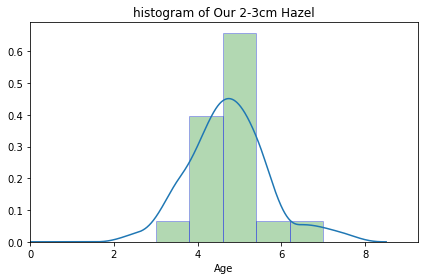

In [32]:
d = ourTwos.Age.values
plt.hist(d, density=True, edgecolor='b', color='g', alpha=0.3, bins=5)

low_bound =1
datad = np.concatenate((d, 2 * low_bound - d))

xd, yd = FFTKDE(bw=.5, kernel='triweight').fit(datad)(2**11)
yd[xd<=low_bound] = 0
yd = yd * 2

plt.xlabel('Age')
plt.plot(xd, yd, label='managed Hazel')
plt.title('histogram of Our 2-3cm Hazel')
plt.tight_layout()
plt.xlim(0,)

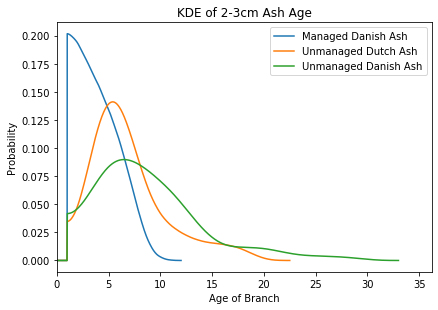

In [37]:
plt.plot(xe, ye, label='Managed Danish Ash')
plt.plot(xw, yw, label='Unmanaged Dutch Ash')
plt.plot(xq, yq, label='Unmanaged Danish Ash')

plt.tight_layout()
plt.xlim(0,)
plt.legend()
plt.title('KDE of 2-3cm Ash Age')
plt.xlabel('Age of Branch')
plt.ylabel('Probability')
plt.savefig("twoToThree", dpi=300)